<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S---Regression-Classification/blob/main/Logistic_Regression%5CMahfuzur_Rahman_Logistic_Regression_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [2]:
# loading the dataset
df = sns.load_dataset('iris')
display(df.head())
display(df.describe(), 'The Three Possible Species', df.species.unique())


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


'The Three Possible Species'

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
X = df.iloc[:, :-1]
display(X)

y = df.iloc[:,-1]
display(y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

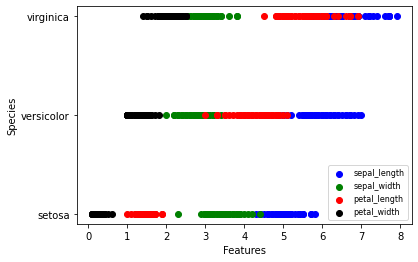

In [4]:
plt.xlabel('Features')
plt.ylabel('Species')

pltX = df.loc[:,'sepal_length']
pltY = df.loc[:,'species']
plt.scatter(pltX, pltY, color = 'blue', label = 'sepal_length')

pltX = df.loc[:,'sepal_width']
pltY = df.loc[:,'species']
plt.scatter(pltX, pltY, color = 'green', label = 'sepal_width')

pltX = df.loc[:,'petal_length']
pltY = df.loc[:,'species']
plt.scatter(pltX, pltY, color = 'red', label = 'petal_length')

pltX = df.loc[:,'petal_width']
pltY = df.loc[:,'species']
plt.scatter(pltX, pltY, color = 'black', label = 'petal_width')

plt.legend(loc = 4, prop = {'size':8})
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


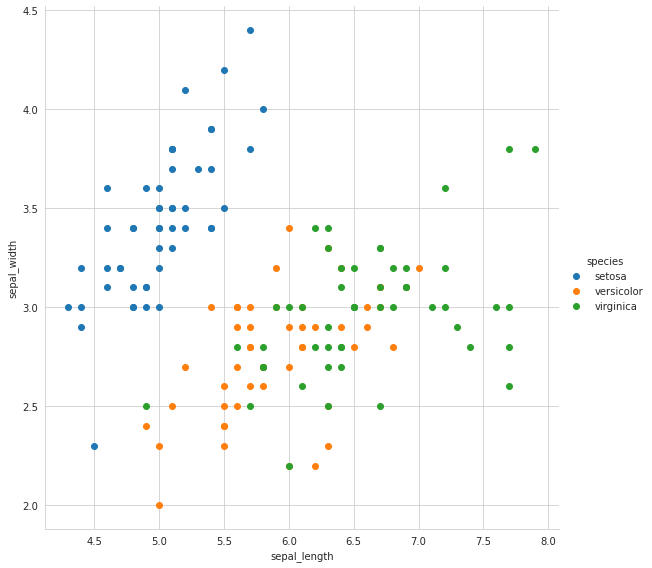

In [5]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'species', size=8) \
              .map(plt.scatter, 'sepal_length', 'sepal_width') \
              .add_legend()
plt.show();

In [6]:
import plotly.express as px
fig = px.scatter_3d(df, x = 'sepal_length', y = 'sepal_width', z = 'petal_width', color = 'species')
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



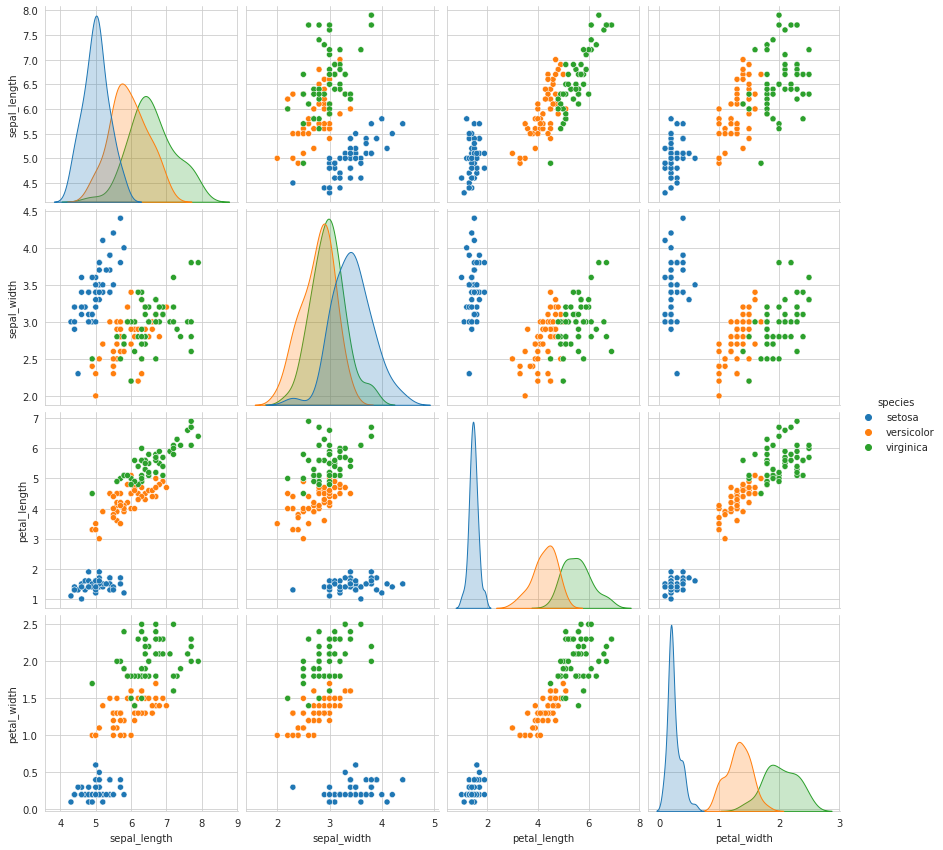

In [7]:
sns.set_style('whitegrid');
sns.pairplot(df, hue = 'species', size=3)
plt.show();

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [9]:
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [10]:
pred  = model.predict(x_test)
print(pred)


print()

print(classification_report(y_test, pred))


['virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa']

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        10
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



the accuracy of the model 0.9666666666666667
Confusion matrix, without normalization
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
normalized confusion matrix
[[1.  0.  0. ]
 [0.  0.9 0.1]
 [0.  0.  1. ]]


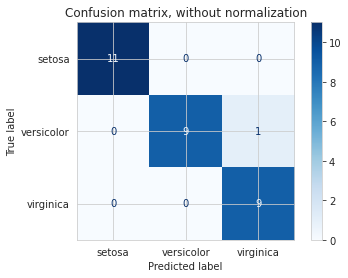

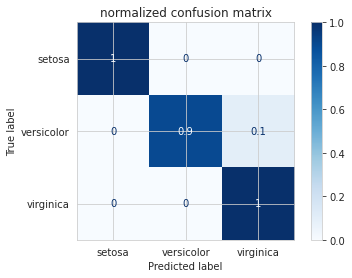

In [11]:
from sklearn.metrics import plot_confusion_matrix
print('the accuracy of the model', accuracy_score(y_test, pred))
class_names = ['setosa', 'versicolor', 'virginica']

titles_options = [('Confusion matrix, without normalization', None),('normalized confusion matrix', 'true')]

for title, normalize in titles_options:
  disp = plot_confusion_matrix(model, x_test, y_test,
                               display_labels = class_names,
                               cmap = plt.cm.Blues,
                               normalize = normalize)
  disp.ax_.set_title(title)
  print(title)
  print(disp.confusion_matrix)

plt.show()